In [1]:
#Κόσυβας Δημήτριος  ΑΜ:03114828
#Θ3
import datetime
import pandas as pd
from math import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import itur
import astropy.units as u

In [2]:
#α)
def latlong(lat,lon):
    R=[]  #rainfall rate exceeded for p% of an average year (mm/h)
    p=[]
    for i in arange(0.001,1,0.001): 
        x=itur.models.itu837.rainfall_rate(lat,lon, i)
        R.append(x)
        p.append(i)
    a=R*(u.mm/u.h) 
    return a,p

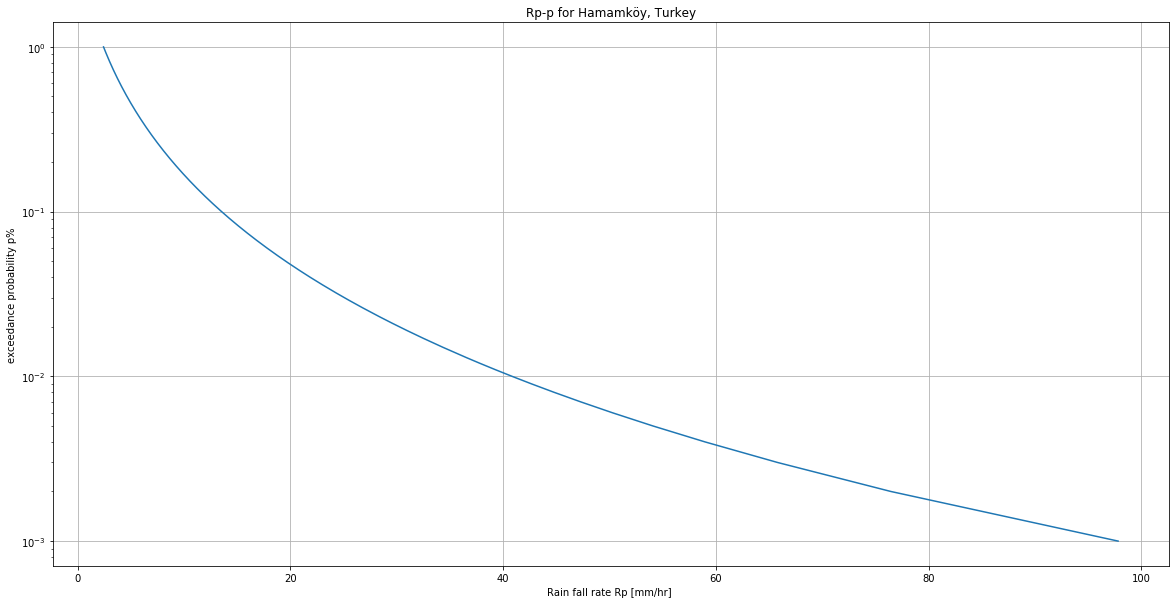

In [5]:
plt.figure(figsize=(20,10))
x1,y1=latlong(38,-28) #For my area Hamamköy, Turkey
plt.semilogy(x1,y1)
plt.title("Rp-p for Hamamköy, Turkey")
plt.ylabel("exceedance probability p%")
plt.xlabel("Rain fall rate Rp [mm/hr] ")
plt.grid()
plt.show()

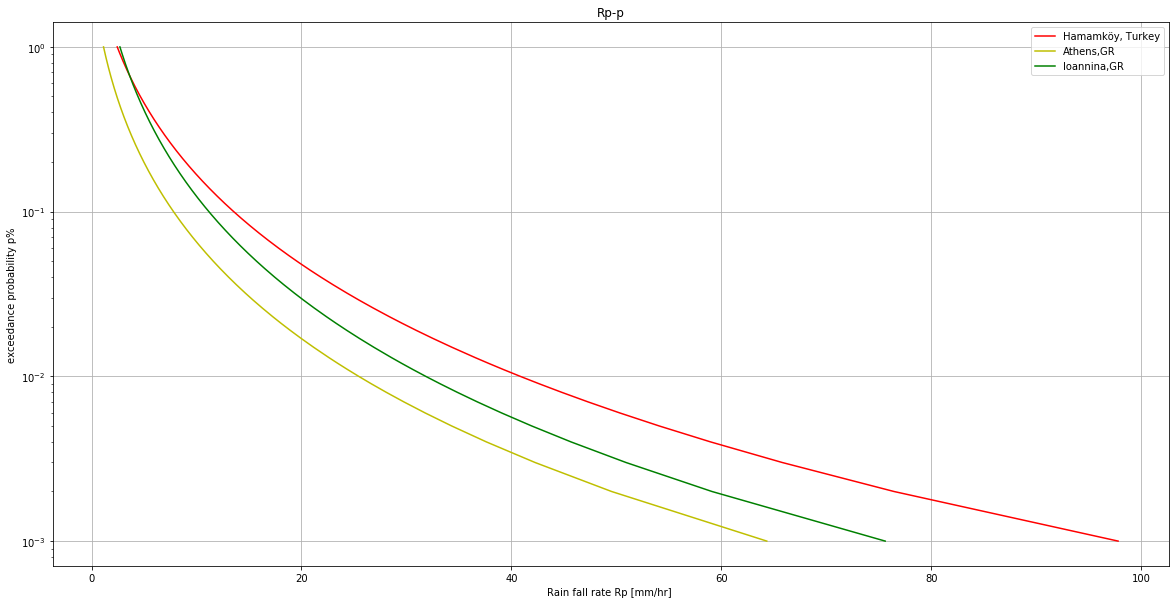

In [7]:
plt.figure(figsize=(20,10))
x2,y2=latlong(37.98,23.73) #For Athens,GR
x3,y3=latlong(39.67,20.85) #For Ioannina,GR
plt.semilogy(x1,y1,'r',label="Hamamköy, Turkey")
plt.semilogy(x2,y2,'y',label="Athens,GR")
plt.semilogy(x3,y3,'g',label="Ioannina,GR")
plt.legend(loc="upper right")
plt.title("Rp-p")
plt.ylabel("exceedance probability p%")
plt.xlabel("Rain fall rate Rp [mm/hr] ")
plt.grid()
plt.show()

In [10]:
#β)
def rain_att(fc,d):
    phi=1 # Διότι στις επίγειες ραδιοζεύξεις, η γωνία φ λαμβάνει πολύ μικρές τιμές
    ti = 90 #κάθετη πόλωση
    if fc==18:
        #από πίνακες Rec. ITU-R P.838-3 για fc=18GHz:
        kh=0.06146 
        ah=1.0949
        kv=0.06797 
        av=1.0137 
    else:
        #από πίνακες Rec. ITU-R P.838-3 για fc=45GHz:
        kh=0.5521 
        ah=0.8355
        kv=0.5375 
        av=0.8123  
    #Βήματα με βάση την σύσταση Rec. ITU-R P.530-15 της itu:
    A = []
    R001 = itur.models.itu837.rainfall_rate(38,-28, 0.01).value
    k=(kh+kv+(kh-kv)*(np.cos(phi)**2)*np.cos(2*ti))/2
    a=(kh*ah+kv*av+(kh*ah-kv*av)*(np.cos(phi)**2)*np.cos(2*ti))/(2*k)
    gamma = k*(R001**a)
    r = abs(1/(0.477*(d**0.633)*(R001**(a*0.073))*(fc**0.123)-10.579*(1-np.exp(-0.024*d))))#distance factor
    deff = d * r
    A001 = gamma*deff
    C0 = 0.12+0.4*0.8*(np.log10(fc/10))
    C1 = (0.07**C0)*(0.12**(1-C0))
    C2 = 0.855*C0 + 0.546*(1-C0)
    C3 = 0.139*C0 + 0.043*(1-C0)
    for i in arange(0.001,1,0.001):
            x = C1*(i**-(C2+C3*np.log10(i)))
            A.append(A001*x)
    return A


In [11]:
p=[]
for i in arange(0.001,1,0.001):
        p.append(i)
A1=rain_att(18,4)
A2=rain_att(18,8)
A3=rain_att(18,12)
A4=rain_att(18,15)
A5=rain_att(45,4)
A6=rain_att(45,8)
A7=rain_att(45,12)
A8=rain_att(45,15)

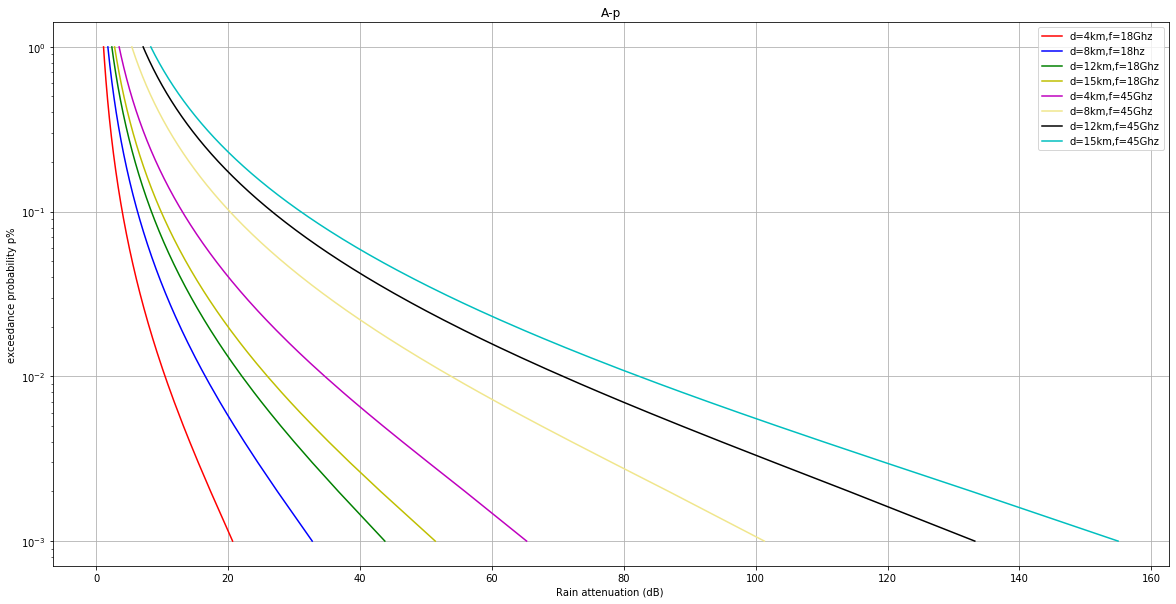

In [12]:
plt.figure(figsize=(20,10))
plt.title("A-p")
plt.semilogy(A1,p,'r',label="d=4km,f=18Ghz") 
plt.semilogy(A2,p,'b',label="d=8km,f=18hz") 
plt.semilogy(A3,p,'g',label="d=12km,f=18Ghz") 
plt.semilogy(A4,p,'y',label="d=15km,f=18Ghz")
plt.semilogy(A5,p,'m',label="d=4km,f=45Ghz") 
plt.semilogy(A6,p,'khaki',label="d=8km,f=45Ghz") 
plt.semilogy(A7,p,'black',label="d=12km,f=45Ghz") 
plt.semilogy(A8,p,'c',label="d=15km,f=45Ghz")
plt.legend(loc="upper right")
plt.ylabel("exceedance probability p%")
plt.xlabel("Rain attenuation (dB) ")
plt.grid()
plt.show()

In [13]:
#γ)
Gt = 10**1.8 
Gr = 10**3.8 
T = 298 #K
Pt = 10**-1.8 #W
B = 28*10**6 #Hz
c = 299792458
k = 1.38*10**-23
def SNRcs(fc,d):
    lamda = c/fc
    FSL = (lamda/(4*np.pi*d))**2
    Pr = Pt*Gt*Gr*FSL
    SNR = Pr/(k*T*B)
    return 10*np.log10(SNR)

In [14]:
#Πιο κάτω υπολογίζω το SNR clear sky για κάθε περίπτωση:
s=SNRcs(18*10**9,4000)
print ("Το SNR clear sky για f=18GHz και d=4km είναι:")
print (s,"dB")
s=SNRcs(18*10**9,8000)
print ("Το SNR clear sky για f=18GHz και d=8km είναι:")
print (s,"dB")
s=SNRcs(18*10**9,12000)
print ("Το SNR clear sky για f=18GHz και d=12km είναι:")
print (s,"dB")
s=SNRcs(18*10**9,15000)
print ("Το SNR clear sky για f=18GHz και d=15km είναι:")
print (s,"dB")
s=SNRcs(36*10**9,4000)
print ("Το SNR clear sky για f=36GHz και d=4km είναι:")
print (s,"dB")
s=SNRcs(36*10**9,8000)
print ("Το SNR clear sky για f=36GHz και d=8km είναι:")
print (s,"dB")
s=SNRcs(36*10**9,12000)
print ("Το SNR clear sky για f=36GHz και d=12km είναι:")
print (s,"dB")
s=SNRcs(36*10**9,15000)
print ("Το SNR clear sky για f=36GHz και d=15km είναι:")
print (s,"dB")
s=SNRcs(54*10**9,4000)
print ("Το SNR clear sky για f=54GHz και d=4km είναι:")
print (s,"dB")
s=SNRcs(54*10**9,8000)
print ("Το SNR clear sky για f=54GHz και d=8km είναι:")
print (s,"dB")
s=SNRcs(54*10**9,12000)
print ("Το SNR clear sky για f=54GHz και d=12km είναι:")
print (s,"dB")
s=SNRcs(45*10**9,15000)
print ("Το SNR clear sky για f=54GHz και d=15km είναι:")
print (s,"dB")


Το SNR clear sky για f=18GHz και d=4km είναι:
37.793033031294144 dB
Το SNR clear sky για f=18GHz και d=8km είναι:
31.77243311801452 dB
Το SNR clear sky για f=18GHz και d=12km είναι:
28.2506079369009 dB
Το SNR clear sky για f=18GHz και d=15km είναι:
26.312407676739767 dB
Το SNR clear sky για f=36GHz και d=4km είναι:
31.77243311801452 dB
Το SNR clear sky για f=36GHz και d=8km είναι:
25.7518332047349 dB
Το SNR clear sky για f=36GHz και d=12km είναι:
22.230008023621274 dB
Το SNR clear sky για f=36GHz και d=15km είναι:
20.29180776346014 dB
Το SNR clear sky για f=54GHz και d=4km είναι:
28.2506079369009 dB
Το SNR clear sky για f=54GHz και d=8km είναι:
22.230008023621277 dB
Το SNR clear sky για f=54GHz και d=12km είναι:
18.70818284250765 dB
Το SNR clear sky για f=54GHz και d=15km είναι:
18.353607503299017 dB


In [10]:
#Θεωρώ SNRthr = SNRcs - max(Rain attenuation),εάν SNRcs>max(Rain attenuation) αλλιώς δεν υπάρχει επικοινωνία



In [15]:
def out(fc,d):
    if SNRcs(fc,d)>max(rain_att(fc/10**9,d/10**3)):
        Pout=0
        SNRth=SNRcs(fc,d)-max(rain_att(fc/10**9,d/10**3))
    else:
        for i in range(0,999):
            if SNRcs(fc,d)>rain_att(fc/10**9,d/10**3)[i]:
                SNRth=SNRcs(fc,d)-rain_att(fc/10**9,d/10**3)[i]
                Pout=p[i-1]/100
                break
    return SNRth,Pout
            

In [19]:
th,po=out(18*10**9,4000)
print ("Για f=18GHz and d=4km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(18*10**9,8000)
print ("Για f=18GHz and d=8km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(18*10**9,12000)
print ("Για f=18GHz and d=12km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(18*10**9,15000)
print ("Για f=18GHz and d=15km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(36*10**9,4000)
print ("Για f=36GHz and d=4km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(36*10**9,8000)
print ("Για f=36GHz and d=8km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(36*10**9,12000)
print ("Για f=36GHz and d=12km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(36*10**9,15000)
print ("Για f=36GHz and d=15km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(54*10**9,4000)
print ("Για f=54GHz and d=4km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(54*10**9,8000)
print ("Για f=54GHz and d=8km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(54*10**9,12000)
print ("Για f=54GHz and d=12km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")
th,po=out(54*10**9,15000)
print ("Για f=54GHz and d=15km η πιθανότητα αποκοπής είναι:",po,"με SNRthr είναι",th,"dB")

Για f=18GHz and d=4km η πιθανότητα αποκοπής είναι: 0 με SNRthr είναι 17.096599483957316 dB
Για f=18GHz and d=8km η πιθανότητα αποκοπής είναι: 1e-05 με SNRthr είναι 4.272151717715527 dB
Για f=18GHz and d=12km η πιθανότητα αποκοπής είναι: 4e-05 με SNRthr είναι 0.24948926954053263 dB
Για f=18GHz and d=15km η πιθανότητα αποκοπής είναι: 9e-05 με SNRthr είναι 0.33054232110474757 dB
Για f=36GHz and d=4km η πιθανότητα αποκοπής είναι: 0.00014000000000000001 με SNRthr είναι 0.384369418005722 dB
Για f=36GHz and d=8km η πιθανότητα αποκοπής είναι: 0.0006900000000000001 με SNRthr είναι 0.17191450599192137 dB
Για f=36GHz and d=12km η πιθανότητα αποκοπής είναι: 0.0016300000000000002 με SNRthr είναι 0.06242531906428539 dB
Για f=36GHz and d=15km η πιθανότητα αποκοπής είναι: 0.0025700000000000002 με SNRthr είναι 0.0035709178921301543 dB
Για f=54GHz and d=4km η πιθανότητα αποκοπής είναι: 0.00015 με SNRthr είναι 0.12120192651044803 dB
Για f=54GHz and d=8km η πιθανότητα αποκοπής είναι: 0.00075 με SNRthr είν

In [57]:
#δ)
#Το καλύτερο που μπορούμε να κάνουμε για να αυξήσουμε την πιθανότητα διαθεσιμότητας της ζεύξης είναι κυρίως Fade Mitigation 
#Techniques(FMT).Συγκεκριμένα α) Power control(κατάλληλη αντιστάθμιση ισχύος σε κάθε περίπτωση), β) Adaptive coding and 
#modulation(κατάλληλος συνδυασμός modulation-στάθμης M και κωδικοποίησης) και γ) diversity protection(χώρου(SIMO,MISO,MIMO),
#πόλωσης,συχνότητας και χρόνου).
